In [22]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load Datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [24]:
# Drop columns with all missing values or irrelevant text-based columns
irrelevant_cols = ['EnglishRules', 'LudRules', 'Id']  # Text-based and ID columns
train_features_cleaned = train_data.drop(columns=irrelevant_cols, errors="ignore")
test_features_cleaned = test_data.drop(columns=irrelevant_cols, errors="ignore")

# Target Variable
target = train_data["utility_agent1"]

In [25]:
# Encode categorical columns in both datasets
categorical_cols = ['GameRulesetName', 'agent1', 'agent2']
train_features_encoded = pd.get_dummies(train_features_cleaned, columns=categorical_cols, drop_first=True)
test_features_encoded = pd.get_dummies(test_features_cleaned, columns=categorical_cols, drop_first=True)

In [26]:
# Align columns between train and test data
common_columns = train_features_encoded.columns.intersection(test_features_encoded.columns)

# Identify missing columns in test data
missing_columns = [col for col in train_features_encoded.columns if col not in test_features_encoded.columns]

# Add missing columns with default values (0) in one step
for col in missing_columns:
    test_features_encoded[col] = 0

# Reorder test columns to match the train data and defragment
test_features_encoded = pd.concat([test_features_encoded], axis=0)[train_features_encoded.columns]

C:\Users\Hi\AppData\Local\Temp\ipykernel_4992\1668647689.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features_encoded[col] = 0
C:\Users\Hi\AppData\Local\Temp\ipykernel_4992\1668647689.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features_encoded[col] = 0
C:\Users\Hi\AppData\Local\Temp\ipykernel_4992\1668647689.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

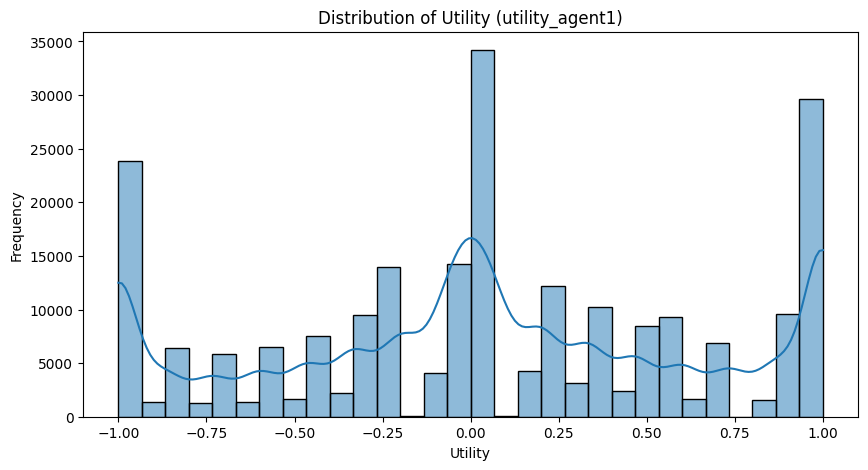

In [5]:
# Target Variable
target = train_data["utility_agent1"]

# Exploratory Data Analysis (EDA)
# Plot distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(target, kde=True, bins=30)
plt.title("Distribution of Utility (utility_agent1)")
plt.xlabel("Utility")
plt.ylabel("Frequency")
plt.show()

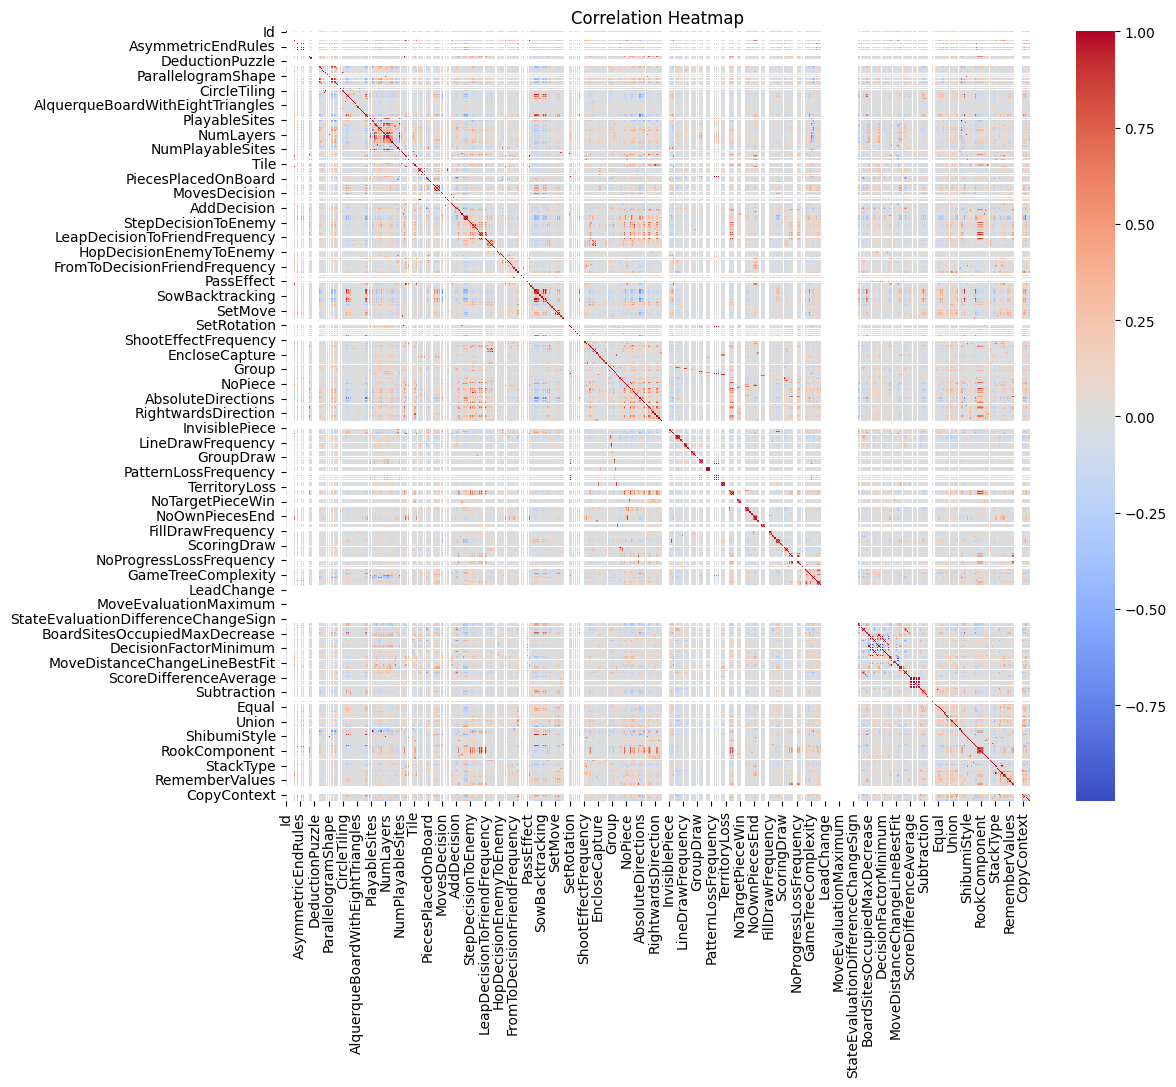

In [9]:
# Correlation Heatmap - Select only numeric columns
numeric_columns = train_features.select_dtypes(include=np.number).columns
correlation_matrix = train_features[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Drop text-based columns and other irrelevant columns
irrelevant_cols = ['EnglishRules', 'LudRules', 'Id']
train_features_cleaned = train_features.drop(columns=irrelevant_cols, errors='ignore')
test_features_cleaned = test_features.drop(columns=irrelevant_cols, errors='ignore')

# Encode categorical columns
categorical_cols = ['GameRulesetName', 'agent1', 'agent2']
train_features_encoded = pd.get_dummies(train_features_cleaned, columns=categorical_cols, drop_first=True)
test_features_encoded = pd.get_dummies(test_features_cleaned, columns=categorical_cols, drop_first=True)

# Align train and test columns
common_columns = train_features_encoded.columns.intersection(test_features_encoded.columns)
train_features_encoded = train_features_encoded[common_columns]
test_features_encoded = test_features_encoded[common_columns]

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(
    train_features_encoded, target, test_size=0.2, random_state=42
)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Validation
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.4640


In [14]:
# Use the encoded training features to extract feature names
feature_importances = pd.DataFrame(
    {
        "Feature": train_features_encoded.columns,  # Use the correct columns from the encoded features
        "Importance": model.feature_importances_,  # Match the length with the encoded features
    }
).sort_values(by="Importance", ascending=False)

C:\Users\Hi\AppData\Local\Temp\ipykernel_4992\1737111609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


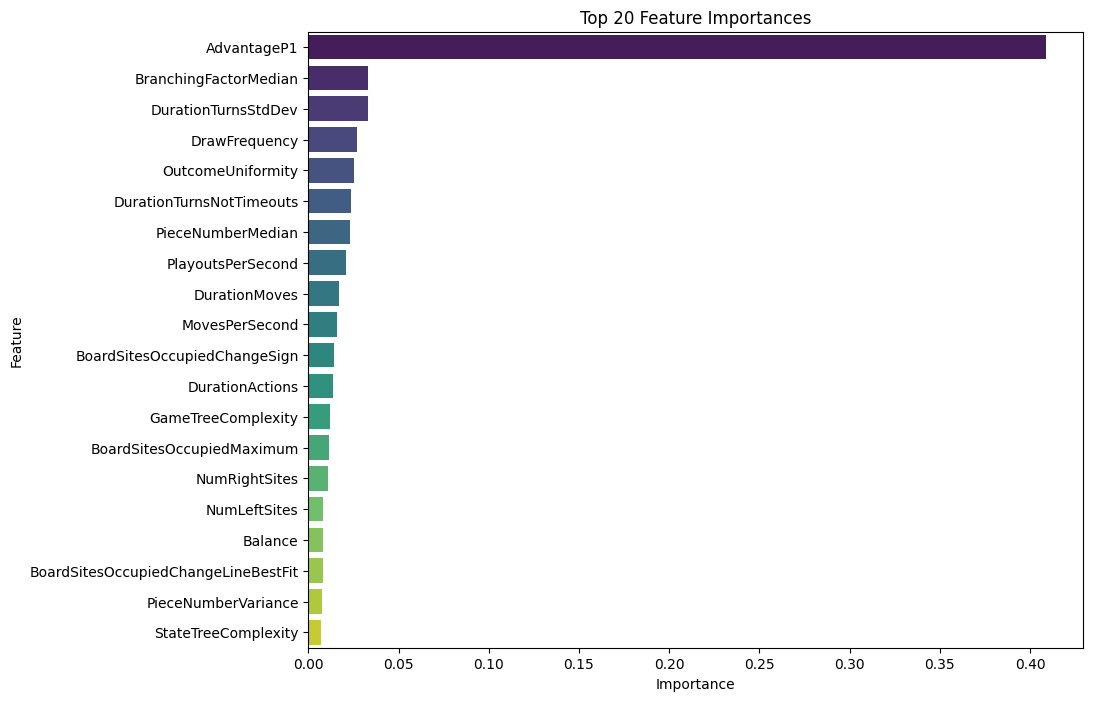

In [15]:
# Plot Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(
    x="Importance", y="Feature", data=feature_importances.head(20), palette="viridis"
)
plt.title("Top 20 Feature Importances")
plt.show()

In [16]:
# Predictions on Test Data
test_predictions = model.predict(test_features)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- EnglishRules
- GameRulesetName
- Id
- LudRules
- agent1
- ...
Feature names seen at fit time, yet now missing:
- agent1_MCTS-UCB1-0.6-NST-false
- agent1_MCTS-UCB1Tuned-0.1-Random200-true
- agent2_MCTS-UCB1-0.6-NST-false


In [ ]:
# Save Submission
submission = pd.DataFrame({"Id": test_data["Id"], "utility_agent1": test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission saved to submission.csv")